In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Load the dataset
df = pd.read_csv('student_pass.csv')
print(df)

   Hours  Pass
0      1     0
1      2     0
2      3     0
3      4     0
4      5     0
5      6     1
6      7     1
7      8     1
8      9     1
9     10     1


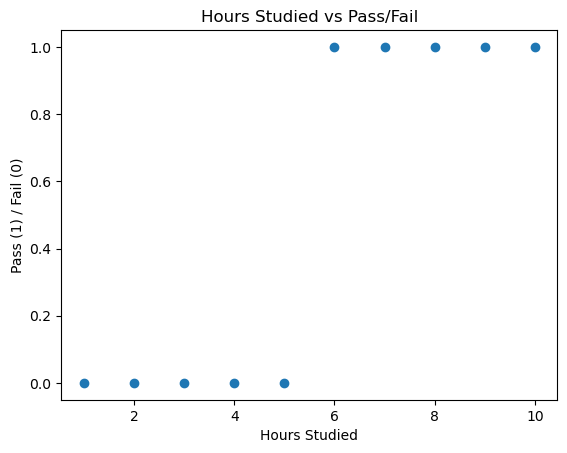

In [7]:
# Visualize the data
plt.scatter(df['Hours'], df['Pass'])
plt.title('Hours Studied vs Pass/Fail')
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.show()

In [9]:
# Prepare features and target
X = df[['Hours']]  # independent variable
y = df['Pass']     # target variable

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create & train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#  Make predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [21]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1 0]
 [0 1]]


In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [27]:
# Predict for a new student
hours = 5.5
predicted_class = model.predict([[hours]])
predicted_prob = model.predict_proba([[hours]])  # probability
print(f"\nPredicted Pass/Fail for {hours} hours studied: {predicted_class[0]}")
print(f"Probability of Passing: {predicted_prob[0][1]:.2f}")


Predicted Pass/Fail for 5.5 hours studied: 0
Probability of Passing: 0.50


C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
# Visualize logistic curve
import numpy as np
X_test_vals = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test_vals)[:, 1]

C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


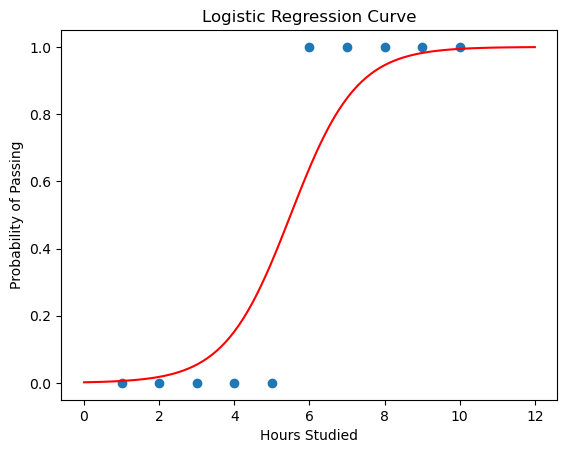

In [37]:
plt.scatter(df['Hours'], df['Pass'])
plt.plot(X_test_vals, y_prob, color='red')  # logistic curve
plt.title('Logistic Regression Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.show()